In [10]:
using Plots, LinearAlgebra, Random, StatsBase
using Interact
gr()

Plots.GRBackend()

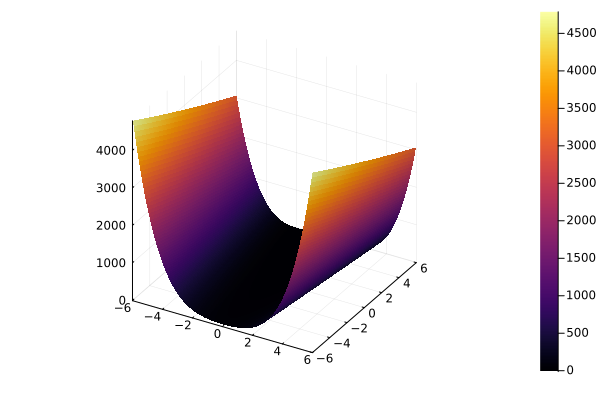

In [2]:
# Let's demonstrate a failure of optimality condition.
# Consider this function
f = (x, y) -> (y - x.^2).*(y - 3*x.^2)
# Create a meshgrid
x = -6:0.05:6
y = -6:0.05:6
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
# Evaluate each f(x, y)
Z = map(f, X, Y)

surface(X, Y, Z)
#zlims!(0,50.0)

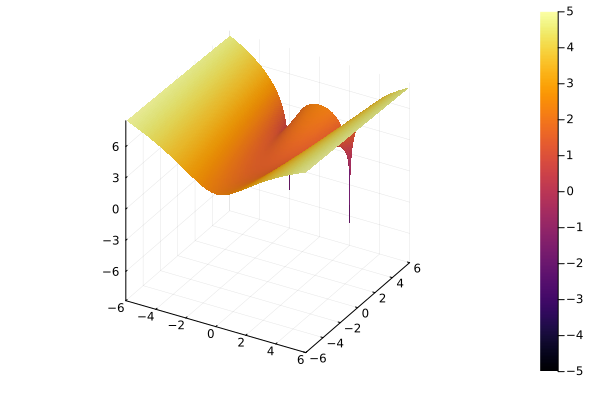

In [3]:
# Show the plot in log-space
gr()
plot(X, Y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))), 
seriestype=:surface, clims=(-5,5))

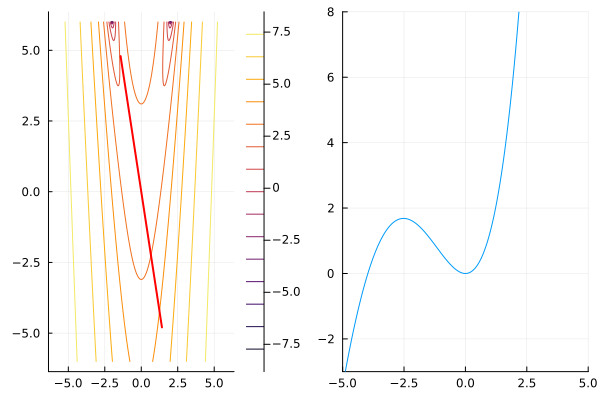

In [4]:
#t = 6*π
t = 5.0
zt = -5:5

ftheta = z -> f(z*cos(t), z*sin(t))

# create a layout
l = @layout [a{0.5w} b]
p = plot(x, y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))),
    st=:contour, layout=l)

plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2), label="")

z = -5:0.01:5
zf = map(ftheta, z)
plot!(p[2], z, zf, xaxis=[-5, 5], ylims=[-3, 8], label="")

In [5]:
gr()
@manipulate for θ = 0.0:(2*pi)/500:2.0*pi
    t = θ
    zt = -5:5
    ftheta = z -> f(z*cos(t), z*sin(t))
    z = -5.0:0.01:5.0
    zf = map(ftheta, z)
    plot(z, zf)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(251), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/dgleich/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dgleich/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dgleich/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/Users/dgleich/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/Users/dgleich/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable, started) @0x000000013b64f210, Task (runnable, started) @0x000000013b64f210), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (5267347088, 5267347152, 5273698544)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.0125664\",\"0.0251327\",\"0.0376991\",\"0.0502655\",\"0.0628319\",\"0.0753982\",\"0.0879646\",\"

In [11]:
gr()
@manipulate for θ = 0:(2*pi)/500:2*pi
    t = θ
    zt = -5:5

    ftheta = z -> f(z*cos(t), z*sin(t))

    # create a layout
    l = @layout [a{0.5w} b]
    p = plot(x, y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))), st=:contour, layout=l)

    plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2))

    z = -5:0.01:5
    zf = map(ftheta, z)
    plot!(p[2], z, zf, xaxis=[-5, 5], yaxis=[-0.5, 1.0])
    p
end

[ Info: Saved animation to /Users/dgleich/Dropbox/courses/cs520-2025/web/input/julia/optimality-1.gif


Plots.AnimatedGif("/Users/dgleich/Dropbox/courses/cs520-2025/web/input/julia/optimality-1.gif")
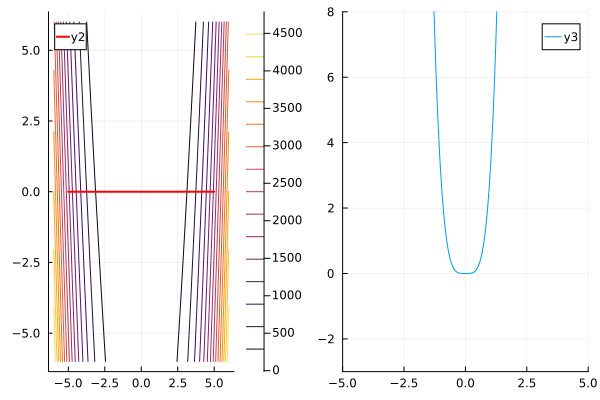

In [8]:
# What we'll do is observe that it has a local minimizer on any line thorugh
# the origin, but there is no minimizer there!
gr()
thetas = 0:0.01:2*pi

anim = @animate for ti = 1:length(thetas)
    # ti = 27 # enable this to get stepping behavior
    t = thetas[ti]
    zt = -5.0:5.0

    ftheta = z -> f(z*cos(t), z*sin(t))

    # create a layout
    l = @layout [a{0.5w} b]
    p = plot(x, y, Z, st=:contour, layout=l)

    plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2))

    z = -5:0.01:5
    zf = map(ftheta, z)
    plot!(p[2], z, zf, xaxis=[-5, 5], yaxis=[-3, 8])
end
gif(anim, "./optimality-1.gif", fps = 10)

In [9]:
## Let's demonstrate the optimality conditions.
# Create a meshgrid
x = -6:0.1:6
y = -6:0.1:6
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
## We'll consider the rosenbrock function.
h = (x, y) -> (1-x).^2 + 5*(y - x.^2).^2
hlog = (x, y) -> log10(h(x, y))

H = map(hlog, X, Y)

plot3d(X, Y, H, seriestype=:surface, zlim=[-2, 4], c=:darktest,
    legend=false)

In [ ]:
## Let's zoom in

# Create a meshgrid
x = 0.975:0.0005:1.025
y = 0.975:0.0005:1.025
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
H = map(h, X, Y)
contour(x, y, H)

In [ ]:
# More zoom
x = 0.99975:0.000005:1.00025
y = 0.99975:0.000005:1.00025
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
H = map(h, X, Y)
contour(x, y, H)


In [ ]:

# Create a meshgrid
x = 0.975:0.0005:1.025
y = 0.975:0.0005:1.025
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
H = map(h, X, Y)
contour(x, y, H)

## Let's zoom in further
x = 0.99975:0.000005:1.00025
y = 0.99975:0.000005:1.00025
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
H = map(h, X, Y)
contour(x, y, H)

## Let's zoom in further
x = 0.9999975:0.00000005:1.0000025
y = 0.9999975:0.00000005:1.0000025
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
H = map(h, X, Y)
contour(x, y, H)

## Let's look at a 3d plot
H = map(hlog, X, Y)

plot3d(X, Y, H, seriestype=:surface, zlim=[-15, -9],
    c=:darktest, clim=[-12, -9],legend=false)